<a href="https://colab.research.google.com/github/nabeharr01/CPS843_TermProject/blob/Ali/ASLTESTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe mediapipe-model-maker
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [2]:
!pip install opencv-python

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# mount your drive and upload your kaggle.json which contains your api keys
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv /content/drive/MyDrive/kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# ASL sheet with mediapipe skeleton
# Download latest version
path = kagglehub.dataset_download("vignonantoine/mediapipe-processed-asl-dataset")

print("Path to dataset files:", path)
# path to dataset for reference
# /root/.cache/kagglehub/datasets/vignonantoine/mediapipe-processed-asl-dataset/versions/1/processed_combine_asl_dataset

100%|██████████| 935M/935M [00:14<00:00, 69.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vignonantoine/mediapipe-processed-asl-dataset/versions/1


In [7]:
import kagglehub

# ASL sheet with hands
# Download latest version
path = kagglehub.dataset_download("signnteam/asl-sign-language-pictures-minus-j-z")

print("Path to dataset files:", path)

100%|██████████| 1.66G/1.66G [00:19<00:00, 93.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/signnteam/asl-sign-language-pictures-minus-j-z/versions/1


In [6]:
!pip install split-folders

In [11]:
# break large dataset into testing datasets
import splitfolders # or import splitfolders
import os
input_folder = "/root/.cache/kagglehub/datasets/signnteam/asl-sign-language-pictures-minus-j-z/versions/1/SigNN Character Database"
output = "/root/.cache/kagglehub/datasets/signnteam/asl-sign-language-pictures-minus-j-z/versions/1/SigNNTester" #where you want the split datasets saved. one will be created if it does not exist or none is set
# 20
splitfolders.ratio(input_folder, output=output, seed=1987, ratio=(0.2,0.8), group_prefix=None, move=False)
# Create the 'None' subfolder within the output directory
none_folder_path = os.path.join(output+"/train", 'None')
os.makedirs(none_folder_path, exist_ok=True)





Copying files: 8442 files [00:10, 788.73 files/s] 


In [20]:
input_folder = "/root/.cache/kagglehub/datasets/vignonantoine/mediapipe-processed-asl-dataset/versions/1/processed_combine_asl_dataset"
output = "/root/.cache/kagglehub/datasets/vignonantoine/mediapipe-processed-asl-dataset/versions/1/mediapipe_tester" #where you want the split datasets saved. one will be created if it does not exist or none is set
# 20
splitfolders.fixed(input_folder, output=output, seed=1987, fixed=(50), group_prefix=None, move=False)
# Create the 'None' subfolder within the output directory
none_folder_path = os.path.join(output+"/train", 'None')
os.makedirs(none_folder_path, exist_ok=True)



Copying files: 0 files [00:00, ? files/s]

Copying files: 118 files [00:00, 1177.61 files/s]

Copying files: 425 files [00:00, 2287.30 files/s]

Copying files: 801 files [00:00, 2958.82 files/s]

Copying files: 1180 files [00:00, 3285.43 files/s]

Copying files: 23277 files [00:56, 411.90 files/s] 


Copying files: 1917 files [00:01, 850.20 files/s] 

Copying files: 2252 files [00:01, 1113.79 files/s]

Copying files: 2598 files [00:01, 1420.77 files/s]

Copying files: 2922 files [00:01, 1707.43 files/s]

Copying files: 3227 files [00:01, 1910.52 files/s]

Copying files: 3569 files [00:02, 2218.62 files/s]

Copying files: 3935 files [00:02, 2543.70 files/s]

Copying files: 4287 files [00:02, 2741.94 files/s]

Copying files: 4615 files [00:02, 2731.29 files/s]
Copying files: 23372 files [00:26, 3497.43 files/s]

Copying files: 4926 files [00:02, 2657.37 files/s]

Copying files: 5292 files [00:02, 2913.97 files/s]

Copying files: 5638 files [00:02, 3059.32 files/s]

Copying files: 5967 

ValueError: The number of samples in class "None" are too few. There are only 0 samples available but your fixed parameter [50] requires at least 50 files. You may want to split your classes by ratio.

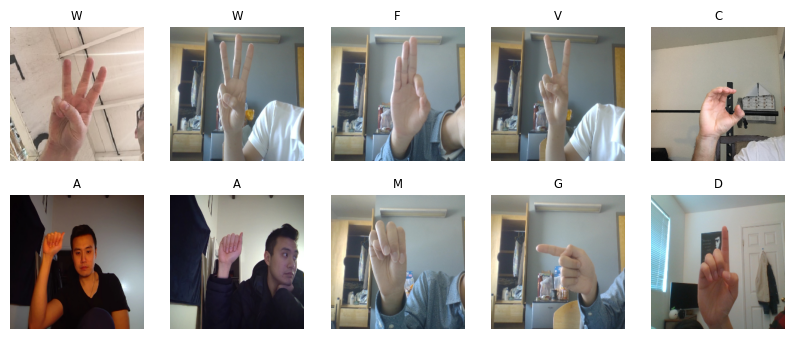

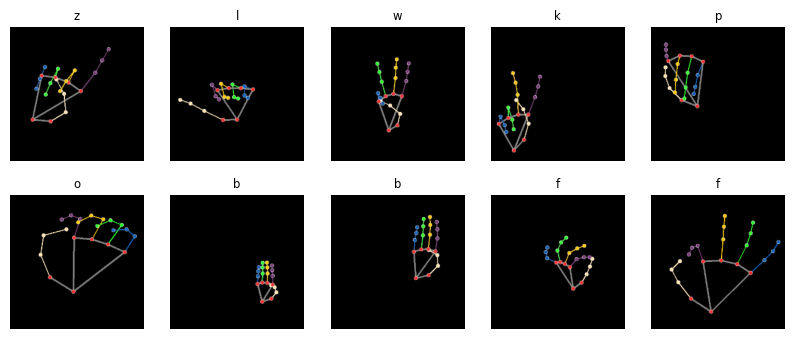

In [12]:
"""Some utility functions for working with the ASL detector dataset/model."""

import pathlib

import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
from mediapipe.framework.formats import landmark_pb2


def find_images(root: str | pathlib.Path) -> list[pathlib.Path]:
    """Find all JPG and PNG images under the given root directory."""
    return list(pathlib.Path(root).glob("**/*.[jpJP][npNP][egEG]*"))


def _read_img(filename, resize=(224, 224)):
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    return cv2.resize(img, resize)


def plot_image_files(filenames, ncols=5, resize=(224, 224)):
    img_arrays = [_read_img(str(f), resize) for f in filenames]
    fig, axarr = _plot_image_array(img_arrays, ncols)
    for i, filename in enumerate(filenames):
        axarr[i].set_title(pathlib.Path(filename).parent.name, size="smaller")
    return fig, axarr


def plot_recognizer_predictions(
    filenames, recognizer, ncols=5, landmarks=True, resize=(224, 224)
):
    img_array = [_read_img(str(f), resize) for f in filenames]

    preds = []
    for arr in img_array:
        img = mp.Image(image_format=mp.ImageFormat.SRGB, data=np.asarray(arr))
        result = recognizer.recognize(img)
        if len(result.gestures) > 0 and len(result.gestures[0]) > 0:
            preds.append(result.gestures[0][0].category_name or "N/A")
            if landmarks:
                draw_hand_landmarks(arr, result.hand_landmarks[0])
        else:
            preds.append("empty")

    fig, axarr = _plot_image_array(img_array, ncols)
    for i, (fname, pred) in enumerate(zip(filenames, preds)):
        axarr[i].set_title(
            f"{pred} (True: {pathlib.Path(fname).parent.name})", size="smaller"
        )
    return fig, axarr


def _plot_image_array(arrays, ncols):
    nrows = int(np.ceil(len(arrays) / ncols))
    fig, axarr = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axarr = np.reshape(axarr, (-1,))
    for ax, img in zip(axarr, arrays):
        ax.imshow(img)
        ax.axis("off")
    return fig, axarr


def draw_hand_landmarks(img, landmarks):
    # slightly modified from here:
    # https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/gesture_recognizer/python/gesture_recognizer.ipynb
    proto = landmark_pb2.NormalizedLandmarkList()
    proto.landmark.extend(  # type: ignore
        [
            landmark_pb2.NormalizedLandmark(  # type: ignore
                x=landmark.x, y=landmark.y, z=landmark.z
            )
            for landmark in landmarks
        ]
    )
    connections = mp.solutions.hands.HAND_CONNECTIONS  # type: ignore
    lm_style = mp.solutions.drawing_styles.get_default_hand_landmarks_style()  # type: ignore
    c_style = mp.solutions.drawing_styles.get_default_hand_connections_style()  # type: ignore
    mp.solutions.drawing_utils.draw_landmarks(  # type: ignore
        img, proto, connections, lm_style, c_style
    )


data_root1 = pathlib.Path("/root/.cache/kagglehub/datasets/signnteam/asl-sign-language-pictures-minus-j-z/versions/1/SigNNTester")
dataset_train1 = data_root1 / "train"
trainfiles1 = find_images(dataset_train1)

sample_files1 = np.random.choice(np.asarray(trainfiles1), 10)
fig1, axarr1 = plot_image_files(sample_files1, ncols=5)

data_root2 = pathlib.Path("/root/.cache/kagglehub/datasets/vignonantoine/mediapipe-processed-asl-dataset/versions/1/")
dataset_train2 = data_root2 / "processed_combine_asl_dataset"
none_folder_path = os.path.join(dataset_train2, 'None')
os.makedirs(none_folder_path, exist_ok=True)
trainfiles2 = find_images(dataset_train2)
sample_files2 = np.random.choice(np.asarray(trainfiles2), 10)
fig2, axarr2 = plot_image_files(sample_files2, ncols=5)

In [13]:
from mediapipe_model_maker.python.vision import gesture_recognizer
## preprocessing the non-mediapiped hands
## WILL TAKE SEVERAL MINUTES ON GOOGLE COLLAB BE WARNED!!!!
## (approx. 5 min)
handparams = gesture_recognizer.HandDataPreprocessingParams(
    min_detection_confidence=0.5
)
##WILL THROW ERROR, TO PREVENT ADD A 'None' folder to dataset, okay if empty
data = gesture_recognizer.Dataset.from_folder(str(dataset_train1), handparams)
train_data, validation_data = data.split(0.8)

dataset_test1 = data_root1 / "train"
test_data1 = gesture_recognizer.Dataset.from_folder(
    str(dataset_test1), handparams
)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder


In [14]:
hparams = gesture_recognizer.HParams(
    export_dir="exported_model",
    batch_size=32,
    epochs=30,
    shuffle=True,
    learning_rate=0.005,
    lr_decay=0.999,
)
moptions = gesture_recognizer.ModelOptions(dropout_rate=0.05)
options = gesture_recognizer.GestureRecognizerOptions(
    hparams=hparams, model_options=moptions
)

In [15]:
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data, validation_data=validation_data, options=options
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 25)                3225      
 out (Dense)                                                     
                                                             

In [17]:
loss, acc = model.evaluate(test_data1, batch_size=32)
print(f"Test loss: {loss:.4f}, Test accuracy: {acc:.2%}")

52/52 [==============================] - 1s 19ms/step - loss: 0.0516 - categorical_accuracy: 0.9670
Test loss: 0.0516, Test accuracy: 96.70%


In [26]:
model.export_model("ASL_TESTER.task")

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [ ]:
import mediapipe as mp
from mediapipe.tasks.python.vision.gesture_recognizer import GestureRecognizer

base_options = mp.tasks.BaseOptions(
    model_asset_path=hparams.export_dir + "/ASL_TESTER.task"
)
options = mp.tasks.vision.GestureRecognizerOptions(
    base_options=base_options, running_mode=mp.tasks.vision.RunningMode.IMAGE
)

with GestureRecognizer.create_from_options(options) as recognizer:
    mp_image = mp.Image.create_from_file(str(filename))
    result = recognizer.recognize(mp_image)